#Library

In [2]:
# Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno
import tensorflow as tf
from tensorflow import keras

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Encoding
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#PCA
from sklearn.decomposition import PCA

#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#K_Means
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

#Data
https://www.kaggle.com/datasets/vetrirah/customer

In [3]:
#Data
df = pd.read_csv('/content/Train.csv', sep=',')

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df.shape

(8068, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
# view frequency counts of values (Melihat frekuensi setiap atribut)
categorical = [var for var in df.columns if df[var].dtype=='O']
for var in categorical:

    print(df[var].value_counts())

Male      4417
Female    3651
Name: Gender, dtype: int64
Yes    4643
No     3285
Name: Ever_Married, dtype: int64
Yes    4968
No     3022
Name: Graduated, dtype: int64
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64
D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


# Handling Missing Value

In [9]:
# Getting Missing count of each sample
for idx in range(df.shape[0]):
    df.loc[idx, 'missing_count'] = df.iloc[idx,:].isnull().sum()

In [10]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 1

print("Samples Before Removal : {}".format(df.shape[0]))

df.drop(df[df['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df.shape[0]))

Samples Before Removal : 8068
Samples After Removal : 6665


#Encoding

In [11]:
obj_cols = df.select_dtypes(include=['object']).columns

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df[obj_cols] = df[obj_cols].apply(lambda col: lb.fit_transform(col))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   int64  
 2   Ever_Married     6665 non-null   int64  
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   int64  
 5   Profession       6665 non-null   int64  
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   int64  
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   int64  
 10  Segmentation     6665 non-null   int64  
 11  missing_count    6665 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 676.9 KB


# Standarization / Scaling

In [14]:
#Scaling
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [15]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,missing_count
0,-0.276997,0.901454,-1.203938,-1.303415,-1.326157,0.912639,-0.478430,0.761894,0.760113,-0.836239,1.297981,-81.633327
1,1.089204,-1.109319,0.830607,1.420092,0.754059,-0.278265,-0.478430,0.761894,-1.207580,0.583047,-0.483535,0.012250
2,-0.695508,0.901454,0.830607,1.420092,0.754059,1.706575,-0.772106,-0.411402,-0.551682,0.583047,-0.483535,0.012250
3,-0.857613,0.901454,0.830607,0.754346,-1.326157,-1.072200,-0.772106,-1.584697,-0.551682,0.583047,0.407223,0.012250
4,-1.310806,0.901454,-1.203938,-0.698191,0.754059,0.912639,-0.478430,0.761894,0.104215,0.583047,0.407223,0.012250


#Multicollinerity

In [16]:
df.drop(['ID','missing_count','Segmentation','Var_1'], axis=1, inplace=True)

# Menambahkan konstanta untuk menghitung VIF
df_const = add_constant(df)

# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["Variable"] = df_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]

# Menampilkan hasil VIF
print(vif_data)

          Variable       VIF
0            const  1.000000
1           Gender  1.025982
2     Ever_Married  2.353725
3              Age  1.781530
4        Graduated  1.226547
5       Profession  1.201558
6  Work_Experience  1.061555
7   Spending_Score  1.838952
8      Family_Size  1.223479


#PCA

In [17]:
pca = PCA(n_components=5)
df_PCA= pca.fit_transform(df)

In [18]:
# Menampilkan nilai eigen
eigenvalues = pca.explained_variance_
print("Nilai Eigen:", eigenvalues)

Nilai Eigen: [2.24455204 1.35120603 1.16637123 0.95347001 0.92181631]


In [19]:
# Menampilkan proporsi variansi yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_
print("Proporsi Variansi yang Dijelaskan:", explained_variance_ratio)

Proporsi Variansi yang Dijelaskan: [0.28052691 0.16887541 0.14577453 0.11916587 0.11520975]


In [20]:
# Menampilkan kumulatif proporsi variansi yang dijelaskan
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print("Kumulatif Proporsi Variansi yang Dijelaskan:", cumulative_explained_variance_ratio)

Kumulatif Proporsi Variansi yang Dijelaskan: [0.28052691 0.44940232 0.59517685 0.71434272 0.82955247]


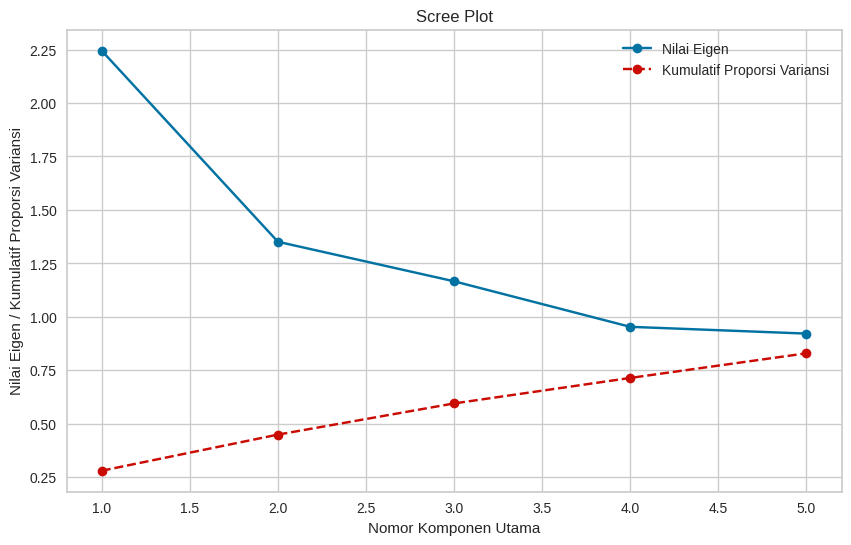

In [21]:
# Membuat scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b', label='Nilai Eigen')
plt.plot(range(1, len(eigenvalues) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--', color='r', label='Kumulatif Proporsi Variansi')
plt.title('Scree Plot')
plt.xlabel('Nomor Komponen Utama')
plt.ylabel('Nilai Eigen / Kumulatif Proporsi Variansi')
plt.legend()
plt.show()

In [22]:
#Membuat df hasil PCA
df = pd.DataFrame(df_PCA, columns=(["col1","col2", "col3", "col4","col5"]))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,6665.0,-1.705729e-17,1.498183,-3.085201,-1.298452,-0.267895,1.267853,3.305098
col2,6665.0,1.359253e-17,1.162414,-3.372927,-0.791690,0.059542,0.828358,4.346037
col3,6665.0,-2.345377e-17,1.079987,-3.202555,-0.734834,-0.073043,0.563538,3.408863
col4,6665.0,2.345377e-17,0.976458,-2.483132,-0.937389,0.251123,0.727169,2.550188
col5,6665.0,-2.451985e-17,0.960113,-2.042923,-0.697551,-0.128376,0.588723,3.963822


In [23]:
df.head()

,col1,col2,col3,col4,col5
0,2.358964,1.314695,0.062861,0.496695,-0.514559
1,-1.315781,-1.259244,1.489799,-0.793082,-0.120616
2,-1.463256,0.922601,1.842796,0.619656,0.105951
3,-1.634820,1.151184,-0.279864,0.344523,-0.394248
4,1.250249,0.026001,0.492948,0.722676,-0.948527


In [24]:
df.shape

(6665, 5)

# K_Means

Elbow Method to determine the number of clusters to be formed:


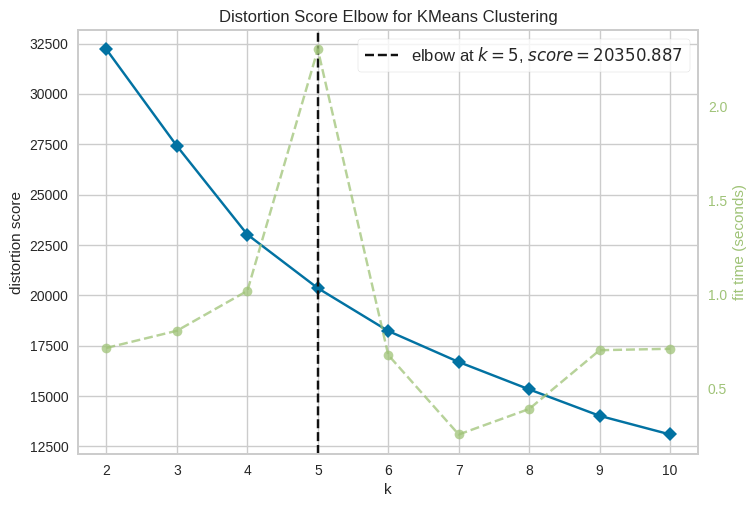

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [27]:
# Menerapkan algoritma k-means
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df)

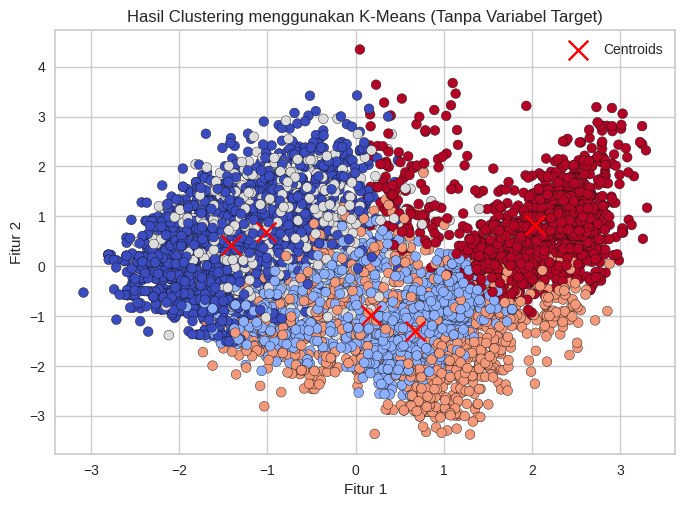

In [28]:
# Membuat plot hasil clustering
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='coolwarm', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()
plt.show()